# Sampling from a Biased Population
I am going to go over some code that recreates the visualizations in the interactive sampling distribution demo. This demo looks a hypotheical problem that illustrates what happen when I sample from a biased population and no the entire population we are interested in.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

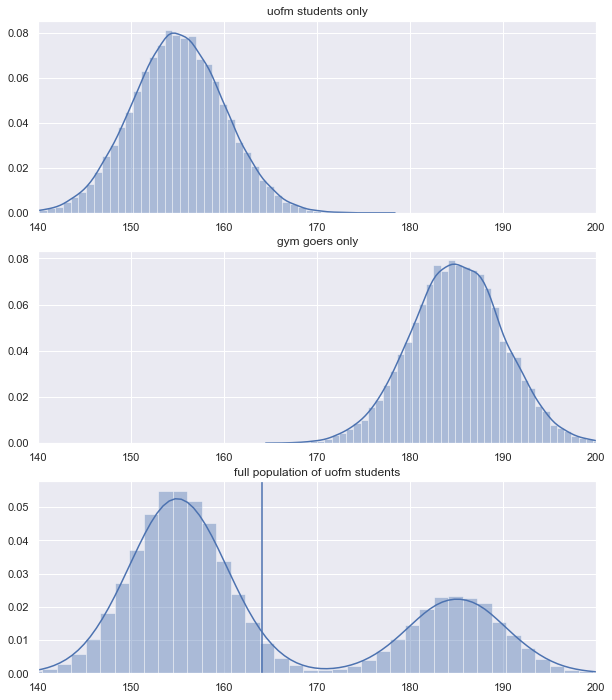

In [11]:
# recreate this sumulation 
mean_uofm = 155
std_uofm = 5
mean_gym = 185
gymperc = 0.3
totalPopSize = 40000

# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, std_uofm, int(totalPopSize * (1-gymperc)))
students_at_gym = np.random.normal(mean_gym, std_uofm, int(totalPopSize * gymperc))

# Create the population from the subgroups
population = np.append(uofm_students,students_at_gym)

plt.figure(figsize = (10,12))

# plot the uofm students only without going to the gym
plt.subplot(3,1,1)
sns.distplot(uofm_students).set(title = 'uofm students only')
plt.xlim([140,200])

# plot the gym goer

plt.subplot(3,1,2)
sns.distplot(students_at_gym).set(title = 'gym goers only')
plt.xlim([140,200])

# plot both groups together
plt.subplot(3,1,3)
sns.distplot(population).set(title = 'full population of uofm students')
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

plt.show()


# What happens if we sample from the entire population?

I will samle randomly from all students at the University of Michigan 

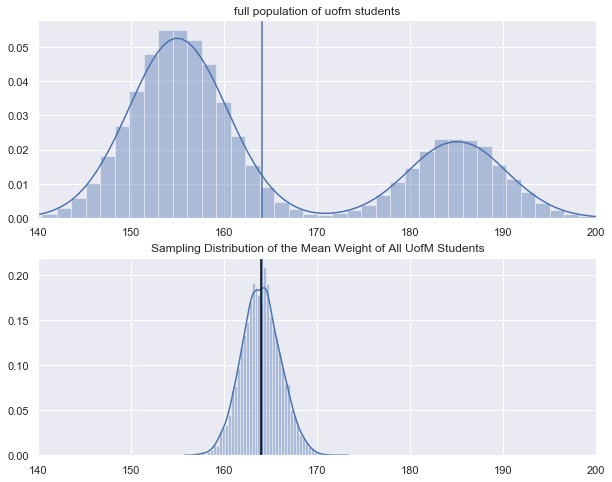

In [15]:
# simulation parameters 
numbersamples = 5000
samplesize = 50

#get the sampling distribution of the mean from only the gym

mean_distribution = np.empty(numbersamples)
for i in range(numbersamples):
    random_students = np.random.choice(population, samplesize)
    mean_distribution[i] = np.mean(random_students)

# plot the population and biased sampling distribution 
plt.figure(figsize = (10,8))

# plotting the population 
plt.subplot(2,1,1)
sns.distplot(population).set(title = 'full population of uofm students')
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# plot the sampling  distribution
plt.subplot(2,1,2)
sns.distplot(mean_distribution).set(title = 'Sampling Distribution of the Mean Weight of All UofM Students')
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(mean_distribution),color = 'black')
plt.xlim([140,200])

plt.show()

# What happens if we take a Non-representative sample?
What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?


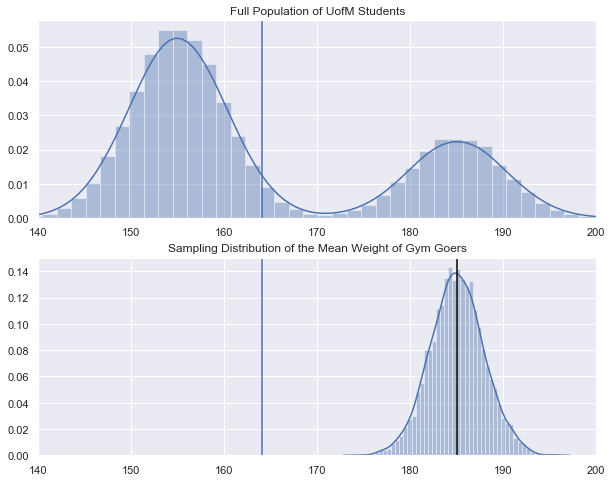

In [17]:
# Simulation parameters
numberSamps = 5000
sampSize = 3

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students) 
    

# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.distplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(students_at_gym), color = "black")
plt.xlim([140,200])

plt.show()